In [1]:
%matplotlib widget

In [34]:
# create 2d system with 1 measurement coordinate so that it can be plotted in 3d

%load_ext autoreload
%autoreload 2


import os
import sys
import numpy as np

def MakeHankelMatrix(X, s):
    '''Turn data matrix into hankel matrix with time delay coordinates, implementation taken from https://stackoverflow.com/questions/71410927/vectorized-way-to-construct-a-block-hankel-matrix-in-numpy-or-scipy '''
    d = s+1
    n, N = X.shape
    if s > 0:
        return np.lib.stride_tricks.sliding_window_view(X, (n, N+1-d)).reshape(d*n, -1)
    else:
        return X

def linearSys(N, x0):
    '''Return data for N instances of linear system evolution'''
    A = np.array([[-0.99, 0.1], [-0.01, -1]])
    
    C = np.zeros((1,2))
    C[0,0] = 1.0
    # C[1,1] = 1.0
    
    x = np.empty((2, N+1))
    x[:,0] = x0.flatten()
    y = np.empty((1, N+1))
    y[:,0] = (C @ x0).flatten()
    
    for i in range(N):
        x[:,i+1] = A @ x[:,i]
        y[:,i+1] = C @ x[:,i+1]
        
        
    # print(np.linalg.matrix_rank(control.obsv(A, C)))
    print(np.linalg.eigvals(A))
    return y

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[-0.995+0.03122499j -0.995-0.03122499j]
[-0.995+0.03122499j -0.995-0.03122499j]
[-0.995+0.03122499j -0.995-0.03122499j]
[-0.995+0.03122499j -0.995-0.03122499j]
[-0.995+0.03122499j -0.995-0.03122499j]


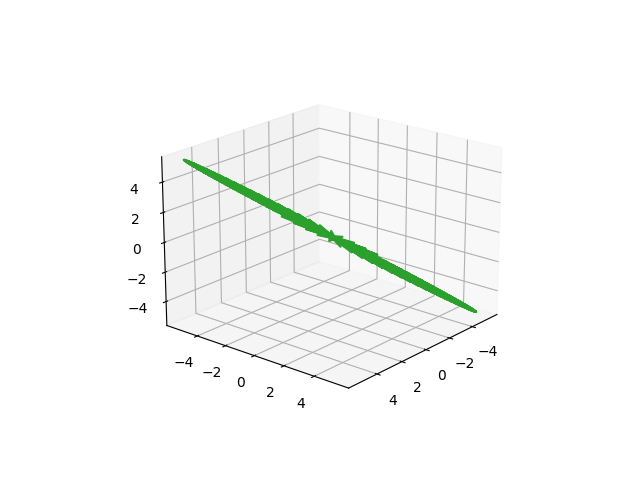

In [35]:
import scipy.linalg
import matplotlib.pyplot as plt
# np.random.seed(123)
# Initialise
N = 100                             # Number of rows of measurement data Y, i.e. measurement sequence length
N_t = 5                           # Number of columns of measurement data Y, i.e. number of measurement sequences
N_g = 2                            # Used to construct measurement data Y
s = 3

# Create multiple trajectories
X = np.empty((N, N_t))
Y = np.empty((s+1, N-s, N_t))
for i in range(N_t):
    Seq = linearSys(N-1, np.array([i, i]))
    X[:,i] = Seq
    Y[...,i] = MakeHankelMatrix(Seq, s)
    
# Plot single trajectory in 3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, 40)

ax.plot3D(Y[0,:,0], Y[1,:,0], Y[2,:,0])
ax.plot3D(Y[0,:,1], Y[1,:,1], Y[2,:,1])
ax.plot3D(Y[0,:,2], Y[1,:,2], Y[2,:,2])
# ax.plot3D(X[:,0], X[:,1], X[:,2])
# fig.show()

# # Plot multiple trajectories in 3d
# fig = plt.figure()
# ax = plt.axes(projection='3d')

Z = Y.reshape((s+1,-1))

# ax.plot3D(Z[0,:], Z[1,:], Z[2,:])


Key 'Generate' not found in system construction
Key 'Autonomous' not found in system construction
Using existing dataset at filepath
[0.3450186  0.9998178  0.83055524]
6


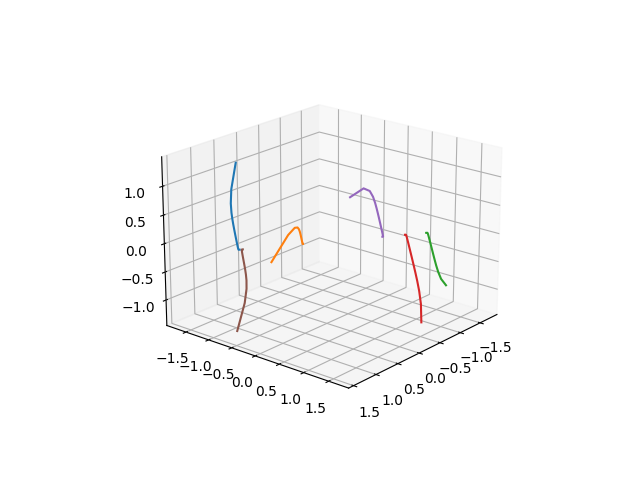

In [9]:
import os
import sys

p = os.path.abspath('../')
if p not in sys.path:
    sys.path.append(p)

import System
import methods
import numpy as np
import Dictionaries
import utils
import matplotlib.pyplot as plt
import scipy.linalg

def randomCirc(N, n, r = 2):
    '''Construct N initial conditions for random points on an n-d sphere of radius r'''
    # Normalised n-d Gaussian points result in a uniform point on a sphere
    
    random_Initialconditions = np.random.randn(N,n)
    return r * random_Initialconditions / np.linalg.norm(random_Initialconditions, axis=1).reshape((N,1))


KordaEquation = System.differentialEquation(System.LinearSystem, 3, 1)

# print(System.LinearSystem(1, np.array([1,2,3]), np.array([0])))
                    
Korda = System.System(KordaEquation, '../testdata/Linear.mat', 100, 10, 0.01, Generate=False, Autonomous=True, Initialisation_function = randomCirc)

A = np.array([[1, 2, 3], [2, 4, 5], [1, 8, 1]])
Astable = - A @ A.transpose()
e,_ = np.linalg.eig(scipy.linalg.expm(Astable * 0.01) )
print(e)

X = Korda.trainingData()
N_t, n, N = X.shape


# Plot single trajectory in 3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, 40)

for i in range(N_t):
    ax.plot3D(X[i,0,:], X[i,1,:], X[i,2,:])
# ax.plot3D(X[1,0,:], X[1,1,:], X[1,2,:])
# ax.plot3D(Y[0,:,1], Y[1,:,1], Y[2,:,1])
# ax.plot3D(Y[0,:,2], Y[1,:,2], Y[2,:,2])